In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy.matlib
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import random

In [2]:
df=pd.read_csv(r'D:\Term6\Machine Learning\Non parametric estimation\ted_main.csv')
print(df)

      comments                                        description  duration  \
0         4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1          265  With the same humor and humanity he exuded in ...       977   
2          124  New York Times columnist David Pogue takes aim...      1286   
3          200  In an emotionally charged talk, MacArthur-winn...      1116   
4          593  You've never seen data presented like this. Wi...      1190   
...        ...                                                ...       ...   
2545        17  Between 2008 and 2016, the United States depor...       476   
2546         6  How can you study Mars without a spaceship? He...       290   
2547        10  Science fiction visions of the future show us ...       651   
2548        32  In an unmissable talk about race and politics ...      1100   
2549         8  With more than half of the world population li...       519   

             event   film_date  languages         m

In [3]:
dur=np.array(pd.Series.to_list((df["duration"])))
x_test=np.arange(min(dur)-50,max(dur)+50)


In [4]:
x_train=np.reshape(dur,(len(dur),1))
x_testt=np.reshape(x_test,(len(x_test),1))

# D

Text(0.5, 1.0, 'density estimation h=10 using python library')

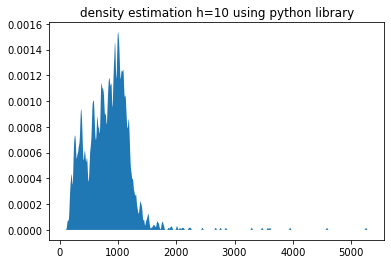

In [53]:
kde_model = KernelDensity(kernel='gaussian', bandwidth=10)
kde_model.fit(x_train)
score = kde_model.score_samples(x_testt)
plt.fill(x_testt, np.exp(score))
plt.title("density estimation h=10 using python library")

# A

We define  function Pn_xi_test that estimates the density function in 1 point.
"mean" is the vector of features,"var" is the bandwidth, "n" is the number of samples, and
x is a vector  the point where we want to estimate the distribution at.

In [11]:
def Pn_xi_test(x,mean,var,n):
    pdf=(1/(var*np.sqrt(2*np.pi)))*np.exp(-0.5*(np.square((x-mean)/var)))
    pn_x=(1/(n*var))*sum(pdf)
    return pn_x

we vectorize number of features and window size in order to map over them

In [12]:
def n_h_vectorized(featur_num,window):
    h_vect=np.ones(featur_num)*window
    n_vect=np.ones(featur_num)*featur_num
    n_h_vect=[n_vect,h_vect]
    return n_h_vect

In [ ]:
dur_mat=np.matlib.repmat(dur,len(x_test),1)

Text(0.5, 1.0, 'window size 10')

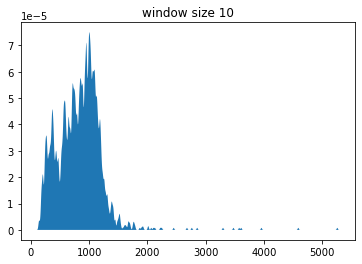

In [13]:
feature_num=len(x_test)
[n_vect, h_vect]=n_h_vectorized(feature_num,10)
y_est=np.array(list(map(Pn_xi_test,x_test,dur_mat,h_vect,n_vect)))
plt.fill(x_test,y_est)
plt.title("window size 10")

As we see the result is as same as part D

# B

Text(0.5, 1.0, 'window size 20')

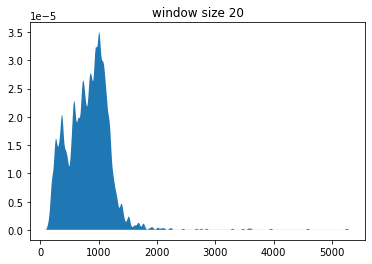

In [59]:
[n_vect, h_vect]=n_h_vectorized(feature_num,20)
y_est=np.array(list(map(Pn_xi_test,x_test,dur_mat,h_vect,n_vect)))
plt.fill(x_test,y_est)
plt.title("window size 20")

Text(0.5, 1.0, 'window size 100')

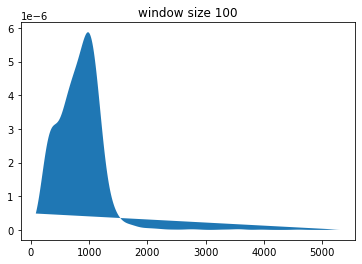

In [61]:
[n_vect, h_vect]=n_h_vectorized(feature_num,100)
y_est=np.array(list(map(Pn_xi_test,x_test,dur_mat,h_vect,n_vect)))
plt.fill(x_test,y_est)
plt.title("window size 100")

We can see that as the window size grows, the plot becomes smoother

# C

We choose n samples with uniform distribution.

In [40]:
 kde_model = KernelDensity(kernel='gaussian', bandwidth=10)
    
        
        
    

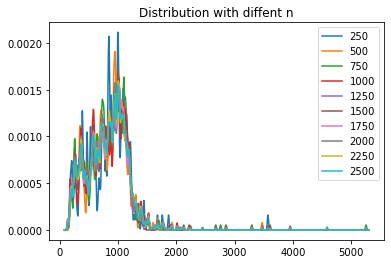

In [62]:
for i in range(250,len(dur)+1,250):
    xn_train=np.random.choice(dur,i,replace=False)
    xn_train=np.reshape(xn_train,(-1,1))
    kde_model.fit(xn_train)
    score = kde_model.score_samples(x_testt)
    w=plt.plot(x_testt, np.exp(score),label=i)
    plt.legend()
    
plt.title("Distribution with diffent n")    
plt.show()       

As n increases, the model becomes more like the real distribution